## 전자상거래 배송 데이터
### 제품 배송 시간에 맞춰 배송되었는지 예측모델 만들기
학습용 데이터 (X_train, y_train)을 이용하여 배송 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 ROC-AUC 평가지표에 따라 채점)

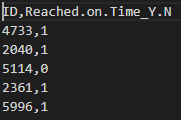

[시험용 데이터셋 만들기] 코드는 예시문제와 동일한 형태의 X_train, y_train, X_test 데이터를 만들기 위함임

(유의사항)
- 성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.
- 수험번호.csv파일이 만들어지도록 코드를 제출한다.
- 제출한 모델의 성능은 ROC-AUC형태로 읽어드린다.

## [참고]작업형2 문구
- 출력을 원하실 경우 print() 함수 활용
- 예시) print(df.head())
- getcwd(), chdir() 등 작업 폴더 설정 불필요
- 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

### 데이터 파일 읽기 예제
- import pandas as pd
- X_test = pd.read_csv("data/X_test.csv")
- X_train = pd.read_csv("data/X_train.csv")
- y_train = pd.read_csv("data/y_train.csv")

### 사용자 코딩

### 답안 제출 참고
- 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
- pd.DataFrame({'cust_id': X_test.cust_id, 'gender': pred}).to_csv('003000000.csv', index=False)

In [53]:
# [시험용 데이터셋 만들기]
# (단, y_test 데이터는 활용해서는 안됨)
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/customer-analytics/Train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, 
                                                  target='Reached.on.Time_Y.N', 
                                                  id_name='ID')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

## 사용자 코딩

In [54]:
# 제공된 3개 데이터 (y_test데이터 활용X)
X_train.shape, X_test.shape, y_train.shape

In [55]:
x = X_train.copy()
y = y_train.copy()
test = X_test.copy()

In [56]:
display(x.head())
print(x.info())

In [57]:
y

In [58]:
# 결측치, 이상치확인

print(x.isnull().sum())

In [59]:
# object 값 삭제 또는 인코딩
x = x.drop(['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'], axis =1)
test = test.drop(['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'], axis =1)

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x,y['Reached.on.Time_Y.N'])
pred = model.predict(test)

In [61]:
y_train

In [68]:
 pd.DataFrame({'cust_id': y_test.ID, 'gender': pred}).to_csv('003001510.csv', index=False)

In [69]:
# 조금 떨어진 성능을 보여주고 있음
round(model.score(test, y_test['Reached.on.Time_Y.N']) * 100, 2)